# The PPOLs Model
### Growing planetary systems with pebble snow.

### Getting Started
Users of the PPOLs Model should:

+ first create a Disk() object (the protoplanetary disk), which predicts the pebble mass flux and flux-averaged Stokes number
+ then create the Seeds() object (the planetesimal seed masses), and
+ use Seeds.grow() to grow the planetesimals and store outputs as attributes

There are many default parameters already set for the Disk object, but these can be changed on object creation. 
Seeds object requires the locations and masses of the seeds, and the Disk for those seeds(where they are "planted", if you like).

See the documentation [here](https://spmccloat.github.io/thePPOLSmodel/index.html).

In [1]:
import thePPOLsCode as plc
import numpy as np

# Example 0: Simplest Case

In [3]:
# The simplest example, using default parameters:

diskprime = plc.Disk()
diskprime.inspect() #inspect(plots=True)

# inspect() is a convenience function to print basic physical properties about the Disk,
# and the option to produce plots for the Stokes number (St), flux, and gas/dust surface densities.

Mstar = 1.0 MSol
Disk mass = 0.200 MSol / 66589 MEarth
Dust mass =  892 MEarth
SigGas/Dust at 1 AU = 8763 / 117 [g/cm^2]
Snowline = None


Note that the St, pebble flux, and snow line position are all determined at Disk creation. Our Disk object, "diskprime", contains several informative attributes, such as the stellar mass, disk mass, temperatue profile, and location of the snow line to name a few. These will display using e.g. `diskprime.MSol`, `diskprime.dmf`, `diskprime.snowline_au`

Next, we create some seed masses at the location of the Solar System planets, and set the starting mass to ~Plutonian mass ($10^{-3} M_{\oplus}$). We will create a Seeds object, and also need to indicate the Disk in which they will grow. This strategy allows different Seeds objecst to grow in the same disk, without having to re-create the same Disk object.

In [3]:
# Seeds:
seeds_au = np.array([0.4, 0.7, 1.0, 1.5, 5, 10, 20, 30, 40]) # au
mass = 1e-3 # Earth masses
seedprime = plc.Seeds(disk=diskprime, seeds_au=seeds_au, mass=mass)

The Seeds are only "planted" at this stage, and require the method `seedprime.grow()`. After this completes, many physical properties are recorded as attributes to the Seeds object, accessible via e.g. `seedprime.finalmass`, `seedprime.wmf`.


In [4]:
seedprime.grow()

Last but not least, a convenience plotting function exists to show the protoplanet masses, water mass fraction, snow line position and evolution, and isolation mass:

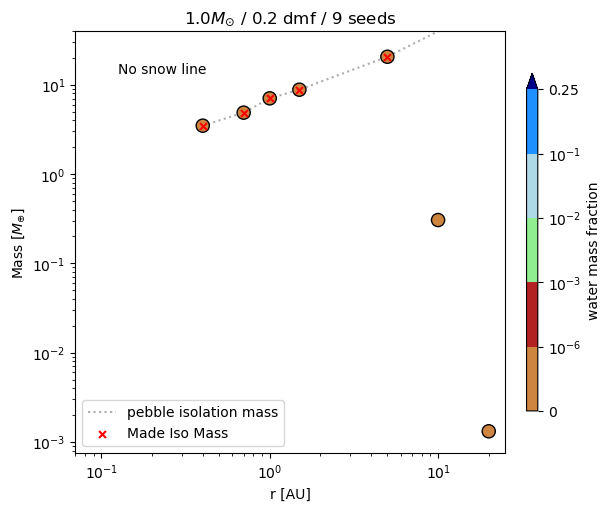

In [5]:
seedprime.gtplot()
# gtplot() can take arguments xlim=[], ylim[], and title=, for user editing. 

# Example 1: 
#### This time we will grow 80 seeds distributed exponentially from 0.5 to 120 AU, starting from $10^{-4} M_{\oplus}$, around a 0.5$M_{\odot}$ star, with an initial total disk mass fraction that is 1% of the stellar mass, and an evolving snow line:


In [6]:
disk_2 = plc.Disk(MSol=0.5, dmf=0.01, snowmode='evol')
newpos = np.geomspace(0.05, 120, 80)
smallmass = 1e-4
seeds_2 = plc.Seeds(disk=disk_2, seeds_au=newpos, mass=smallmass)
seeds_2.grow()

/Users/seanmccloat/Documents/git_repos/thePPOLSmodel/src/PP.py:197: RuntimeWarning: overflow encountered in exp
  stini = st0 * np.exp(tgrid[it]/tgrowth[:])


Mstar = 0.5 MSol
Disk mass = 0.005 MSol / 832 MEarth
Dust mass =   22 MEarth
SigGas/Dust at 1 AU = 219 / 3 [g/cm^2]
Snowline Starts/Ends = 0.45/0.15 AU


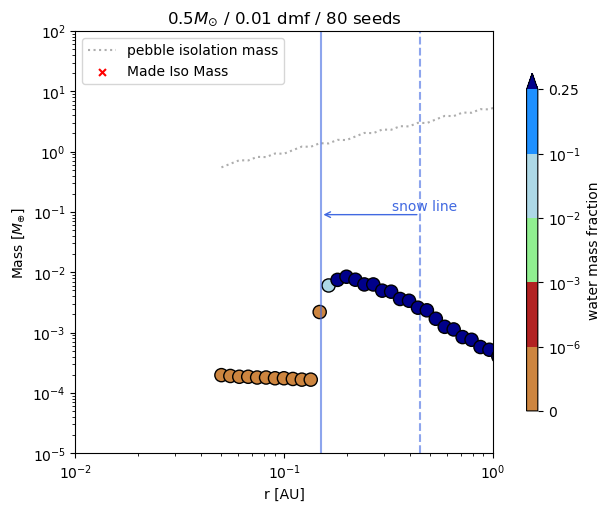

In [7]:
disk_2.inspect()
seeds_2.gtplot(ylim=[1e-5,1e2], xlim=[0.01,1])

## Notes
#### The two examples above are meant to be simple presentations of the basic, and primary, functionality of the PPOLs Model: simple protoplanet growth by pebble accretion. The "pebble snow" comes in with the equally simple implementation of an evolving snow line. In example 1, this was done using the "snowmode" parameter, which can be 'evol', 'temp', 'none', or set explicitly to float, in au.

#### See the documentation (e.g. `plc.Disk?`, or `plc.Seeds?`) for full parameters, defaults, and options.

# Example 2:
#### Suppose we want to work with a disk with a set initial amount of solid mass, say, 650 $M_{\oplus}$ of initial dust. This is easily done by setting this as the dmf value on Disk creation - the code automatically interprets dmf values >1 as the solid mass, in Earth masses.

#### Note also the other changes to e.g. mass, snowmode...

In [8]:
anotherdisk = plc.Disk(dmf=650, MSol=0.78, snowmode=5.2)
moreseeds = plc.Seeds(disk=anotherdisk, seeds_au=newpos, mass=5e-3)
moreseeds.grow()

/Users/seanmccloat/Documents/git_repos/thePPOLSmodel/src/PP.py:197: RuntimeWarning: overflow encountered in exp
  stini = st0 * np.exp(tgrid[it]/tgrowth[:])


Mstar = 0.78 MSol
Disk mass = 0.146 MSol / 37836 MEarth
Dust mass =  650 MEarth
SigGas/Dust at 1 AU = 6384 / 43 [g/cm^2]
Snowline = 5.20 au


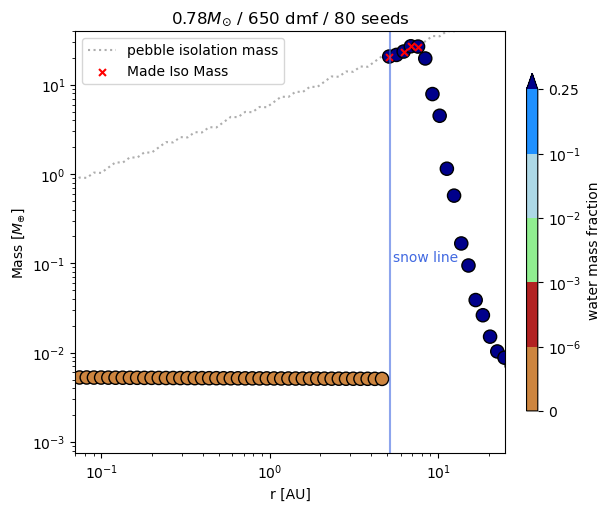

In [9]:
anotherdisk.inspect()
moreseeds.gtplot()

# Keep in mind
The main functionality of the PPOLs Model is to enable flexible efficient planetary assembly via pebble snow, tracking the mass and water mass fraction of growing seed masses. Users can change the stellar mass, disk mass, snow line position in a variety of ways. Be sure to explore the docs for all the options.

Many useful physical parameters are available as attributes in the Disk or Seeds object, and most paramaters are recorded as functions of both radial position (au) and time. Please reach out to spmccloat@gmail.com with questions.